# 1.0 IMPORT LIBRARIES & DATA


In [14]:
# ---------------------------

# Data Analysis
import pandas as pd
import numpy as np

# Modeling
import statsmodels.api as sm
from pygam import GAM, ExpectileGAM, s, l, f
from sklearn.preprocessing import LabelEncoder

# Visualization
import plotly.express as px
from plotnine import *
import pytimetk as tk 
import textwrap

In [15]:
# Load data
data = pd.read_csv("C:/Users/nfole/OneDrive/Desktop/Price_optimization.csv")


data.describe(include='all').T


count unique                                top freq  \
price          800.0    NaN                                NaN  NaN   
quantity_sold  800.0    NaN                                NaN  NaN   
product          800      4  Standard Case | iPhone 15 Pro Max  200   
event            800      5                           No Promo  560   

                    mean         std   min     25%     50%     75%     max  
price          40.911325   20.980488  5.19  24.365  39.825   55.37   89.98  
quantity_sold   632.9025  371.748974   0.0   283.0   682.5  934.75  1575.0  
product              NaN         NaN   NaN     NaN     NaN     NaN     NaN  
event                NaN         NaN   NaN     NaN     NaN     NaN     NaN

# 2.0 DATA PREPARATION
# --------------------

In [16]:
data['is_event'] = (data['event'] != "No Promo").astype(int).astype(str)

data['revenue'] = data['price'] * data['quantity_sold']

# 3.0 EXPLORATORY DATA ANALYSIS

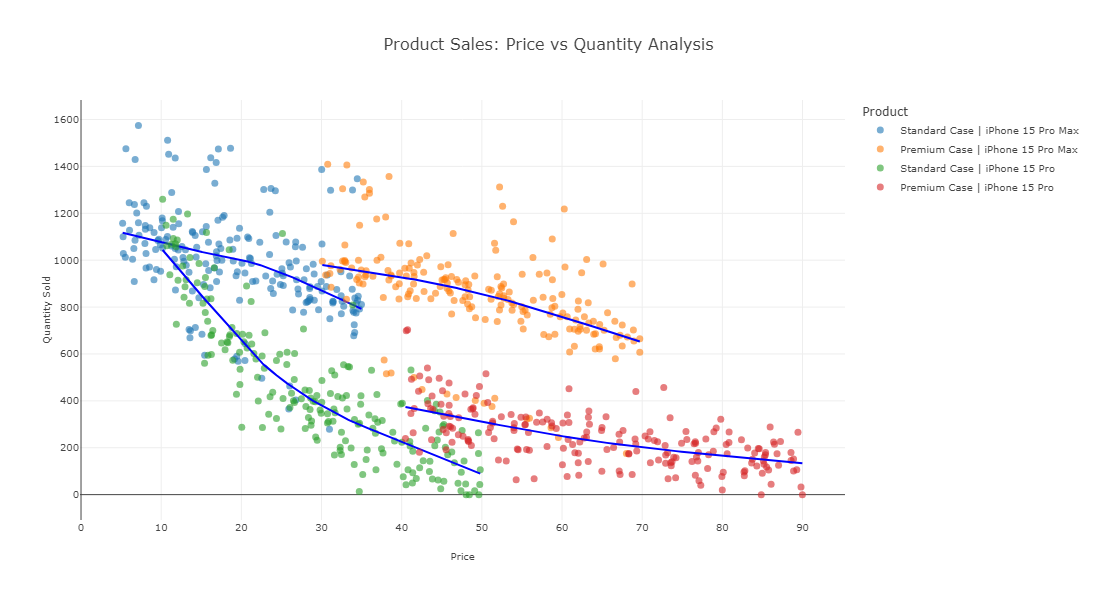

In [17]:
# -----------------------------

# TRENDS: PRICE vs QUANTITY SOLD
fig = px.scatter(
    data,
    x='price',
    y='quantity_sold',
    color='product',
    opacity=0.6, 
    trendline="lowess",  
    trendline_color_override="blue",
    template="none",
    title='Product Sales: Price vs Quantity Analysis',
    width=800, 
    height=600,
).update_traces(
    marker=dict(size=7),
    hoverlabel=dict(font=dict(size=10)),
).update_layout(
    legend_title_text='Product',
    title_font=dict(size=16),
    legend_font=dict(size=10),
).update_xaxes(
    title_text='Price',
    title_font=dict(size=10), 
    tickfont=dict(size=10),
).update_yaxes(
    title_text='Quantity Sold',
    title_font=dict(size=10), 
    tickfont=dict(size=10),
)

fig


# 4.0 EVENT ANALYSIS (OUTLIERS)

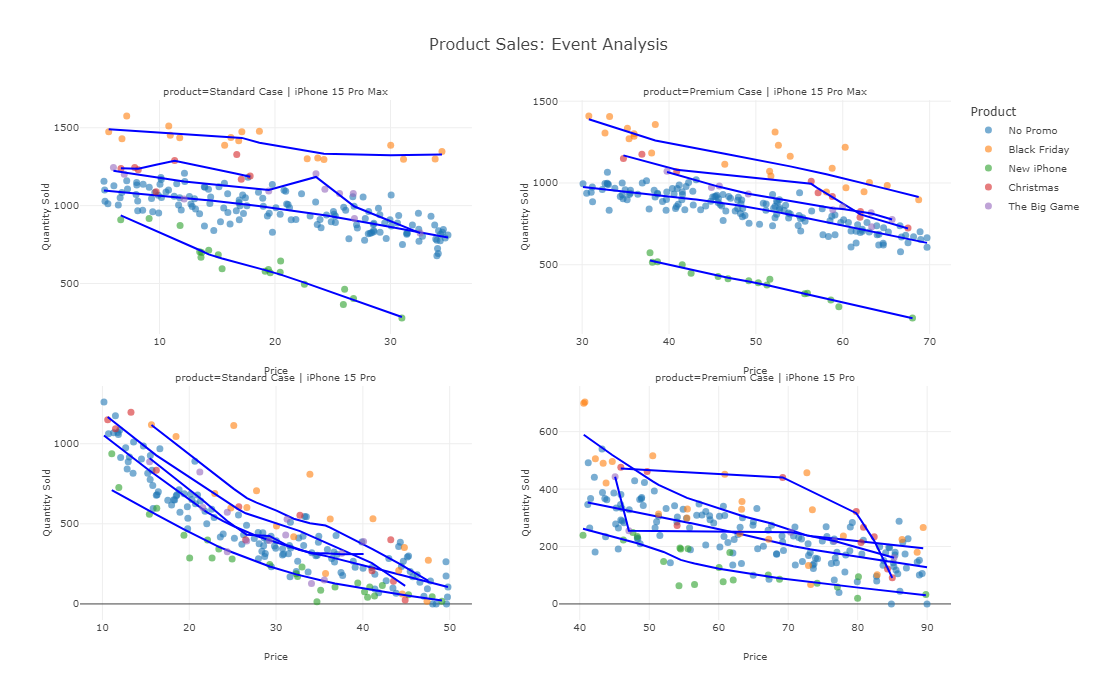

In [18]:
# SCATTER PLOT
fig = px.scatter(
    data,
    x='price',
    y='quantity_sold',
    color='event',
    facet_col='product',
    facet_col_wrap=2,
    facet_col_spacing=0.1,
    facet_row_spacing=0.1,
    opacity=0.6, 
    trendline="lowess",  
    trendline_color_override="blue",
    template="none",
    title='Product Sales: Event Analysis',
    width=800, 
    height=700,
).update_traces(
    marker=dict(size=7),
    hoverlabel=dict(font=dict(size=10)),
).update_layout(
    legend_title_text='Product',
    title_font=dict(size=16),
    legend_font=dict(size=10),
).update_xaxes(
    title_text='Price',
    title_font=dict(size=10), 
    tickfont=dict(size=10),
    matches=None,
).update_yaxes(
    title_text='Quantity Sold',
    title_font=dict(size=10), 
    tickfont=dict(size=10),
    matches=None,
)

for annotation in fig['layout']['annotations']: 
    annotation['font'] = dict(size=10) 
    
fig.for_each_xaxis(lambda axis: axis.update(showticklabels=True))
fig.for_each_yaxis(lambda axis: axis.update(showticklabels=True))

fig


# 5.0 MODELING EVENT IMPACT

In [20]:
df_encoded = data.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['event', 'product'], drop_first=False)

colnames_event = df_encoded.columns[df_encoded.columns.str.startswith('event')].tolist()

df_encoded[colnames_event] = df_encoded[colnames_event].astype(int)

colnames_product = df_encoded.columns[df_encoded.columns.str.startswith('product')].tolist()

df_encoded[colnames_product] = df_encoded[colnames_product].astype(int)


X = df_encoded[['price'] + colnames_event + colnames_product]
X = sm.add_constant(X)  # Adds a constant to the model (intercept)
y = df_encoded['quantity_sold']

df_encoded

price  quantity_sold is_event   revenue  event_Black Friday  \
0    12.16           1208        0  14689.28                   0   
1    33.87           1299        1  43997.13                   1   
2    23.04            933        0  21496.32                   0   
3    20.45            572        1  11697.40                   0   
4    17.08           1170        1  19983.60                   0   
..     ...            ...      ...       ...                 ...   
795  60.05            127        1   7626.35                   0   
796  68.33            175        0  11957.75                   0   
797  72.69            457        1  33219.33                   1   
798  54.28             63        1   3419.64                   0   
799  84.60            196        0  16581.60                   0   

     event_Christmas  event_New iPhone  event_No Promo  event_The Big Game  \
0                  0                 0               1                   0   
1                  0                 0               0                   0   
2                  0                 0               1                   0   
3                  0                 1               0                   0   
4                  1                 0               0                   0   
..               ...               ...             ...                 ...   
795                0                 1               0                   0   
796                0                 0               1                   0   
797                0                 0               0                   0   
798                0                 1               0                   0   
799                0                 0               1                   0   

     product_Premium Case | iPhone 15 Pro  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
..                                    ...   
795                                     1   
796                                     1   
797                                     1   
798                                     1   
799                                     1   

     product_Premium Case | iPhone 15 Pro Max  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
795                                         0   
796                                         0   
797                                         0   
798                                         0   
799                                         0   

     product_Standard Case | iPhone 15 Pro  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
..                                     ...   
795                                      0   
796                                      0   
797                                      0   
798                                      0   
799                                      0   

     product_Standard Case | iPhone 15 Pro Max  
0                                            1  
1                                            1  
2                                            1  
3                                            1  
4                                            1  
..                                         ...  
795                                          0  
796                                          0  
797                                          0  
798                                          0  
799                          

In [35]:
model = sm.OLS(y, X).fit()

model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          quantity_sold   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              43.00
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                    3.53e-12
Time:                        10:20:34   Log-Likelihood:                         -400.32
No. Observations:                  60   AIC:                                      804.6
Df Residuals:                      58   BIC:                                      808.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          4.1191      0.546      7.546      0.000       3.026       5.212
event        -37.5959     23.512     -1.599      0.115     -84.661       9.469
==============================================================================
Omnibus:                        4.512   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.173
Skew:                           0.645   Prob(JB):                        0.124
Kurtosis:                       2.947   Cond. No.                         61.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6.0 GENERAL PRICE OPTIMIZATION: GAMs
# ----------------------------------

In [22]:
# PROBLEM: Prices are non-linear
# SOLUTION: Use GAMs (Generalized Additive Models)
# NOTES:
# - GAMs are like Linear Regression, but allow for non-linear relationships
# - NOT as useful for incorporating events (see next section)

# Keep the entire data as data_filtered
data_filtered = data.query('event == "No Promo"')

# Create a list of unique products
unique_products = data_filtered['product'].unique()

# Create an empty dataframe to store the concatenated results
all_gam_results = pd.DataFrame()

# Loop through each product
for product in unique_products:
    # Filter data for the current product
    product_data = data_filtered[data_filtered['product'] == product]
    
    X = product_data[['price']]
    y = product_data['quantity_sold']
    
    quantiles = [0.025, 0.5, 0.975]
    gam_results = {}

    # Fit the GAM model for the filtered data
    for q in quantiles:
        gam = ExpectileGAM(s(0), expectile=q)
        gam.fit(X, y)
        gam_results[f"pred_{q}"] = gam.predict(X)
    
    # Store the results in a dataframe with index that matches the original data
    predictions_gam = pd.DataFrame(gam_results).set_index(X.index)
    
    # Concatenate the results column-wise with the original data
    predictions_gam_df = pd.concat([product_data[['price', 'product', 'quantity_sold']], predictions_gam], axis=1)
    
    # Concatenate results row-wise
    all_gam_results = pd.concat([all_gam_results, predictions_gam_df], axis=0)

all_gam_results

price                            product  quantity_sold  pred_0.025  \
0    12.16  Standard Case | iPhone 15 Pro Max           1208  936.044699   
2    23.04  Standard Case | iPhone 15 Pro Max            933  873.571104   
5    31.41  Standard Case | iPhone 15 Pro Max            825  764.526030   
6    15.92  Standard Case | iPhone 15 Pro Max            956  891.101051   
8    10.12  Standard Case | iPhone 15 Pro Max           1180  966.403722   
..     ...                                ...            ...         ...   
792  73.72       Premium Case | iPhone 15 Pro            140  109.223598   
793  63.27       Premium Case | iPhone 15 Pro            141  142.335381   
794  83.75       Premium Case | iPhone 15 Pro            151   57.256986   
796  68.33       Premium Case | iPhone 15 Pro            175  118.528252   
799  84.60       Premium Case | iPhone 15 Pro            196   52.817411   

        pred_0.5   pred_0.975  
0    1056.475514  1154.146510  
2     956.955566  1052.298391  
5     855.147747   973.488884  
6    1007.301043  1130.320181  
8    1076.775625  1158.523702  
..           ...          ...  
792   179.842878   249.371987  
793   231.497810   307.703883  
794   155.666478   247.043239  
796   207.001590   273.722289  
799   153.299060   242.991816  

[560 rows x 6 columns]

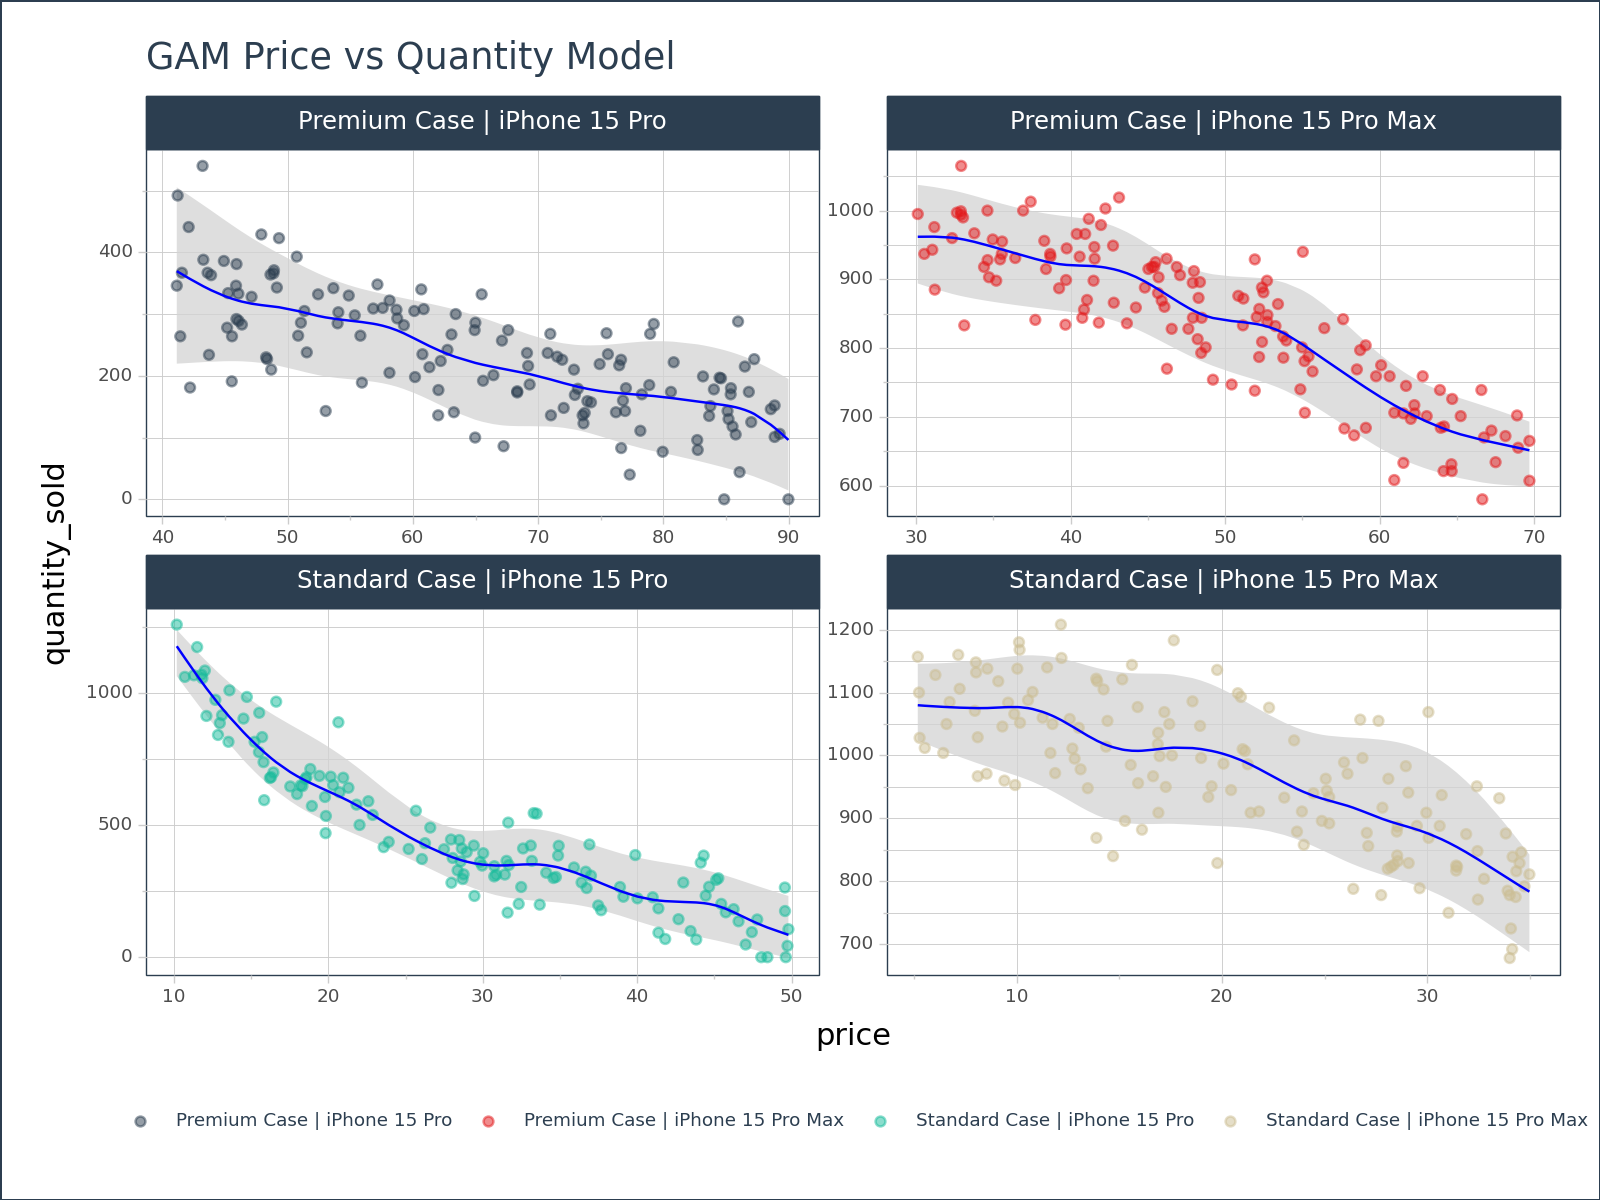

<Figure Size: (800 x 600)>

In [23]:

# Visualize the GAM Price Model Results
ggplot(
        data = all_gam_results,
        mapping = aes(x='price', y='quantity_sold', color='product', group = 'product'),
    ) + \
    geom_ribbon(aes(ymax = "pred_0.975", ymin = "pred_0.025"), fill = "#d3d3d3", color = "#FF000000", alpha = 0.75, show_legend = False) + \
    geom_point(alpha=0.5) + \
    geom_line(aes(y = "pred_0.5"), color = "blue") + \
    facet_wrap('product', scales="free") + \
    labs(title = "GAM Price vs Quantity Model") + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width = 800, height = 600) 

In [27]:
# Optimize Price for Predicted Daily Revenue

for col in all_gam_results.columns:
    if col.startswith('pred'):
        all_gam_results['revenue_' + col] =all_gam_results['price'] * all_gam_results[col]

all_gam_results['revenue_actual'] = all_gam_results['price'] * all_gam_results['quantity_sold']

all_gam_results

best_50 = all_gam_results \
    .groupby('product') \
    .apply(lambda x: x[x['revenue_pred_0.5'] == x['revenue_pred_0.5'].max()].head(1)) \
    .reset_index(level=0, drop=True)
    
best_975 = all_gam_results \
    .groupby('product') \
    .apply(lambda x: x[x['revenue_pred_0.975'] == x['revenue_pred_0.975'].max()].head(1)) \
    .reset_index(level=0, drop=True)
    
best_025 = all_gam_results \
    .groupby('product') \
    .apply(lambda x: x[x['revenue_pred_0.025'] == x['revenue_pred_0.025'].max()].head(1)) \
    .reset_index(level=0, drop=True)
best_50


price                            product  quantity_sold  pred_0.025  \
681  57.59       Premium Case | iPhone 15 Pro            310  187.930913   
249  69.70   Premium Case | iPhone 15 Pro Max            665  599.112739   
501  20.96      Standard Case | iPhone 15 Pro            680  485.631098   
126  34.98  Standard Case | iPhone 15 Pro Max            811  687.317784   

       pred_0.5  pred_0.975  revenue_pred_0.025  revenue_pred_0.5  \
681  281.136183  332.759844        10822.941290      16190.632764   
249  651.307076  692.913329        41758.157914      45396.103224   
501  602.293478  758.898625        10178.827809      12624.071301   
126  783.531007  842.462477        24042.376077      27407.914622   

     revenue_pred_0.975  revenue_actual  
681        19163.639437        17852.90  
249        48296.058997        46350.50  
501        15906.515173        14252.80  
126        29469.337448        28368.78

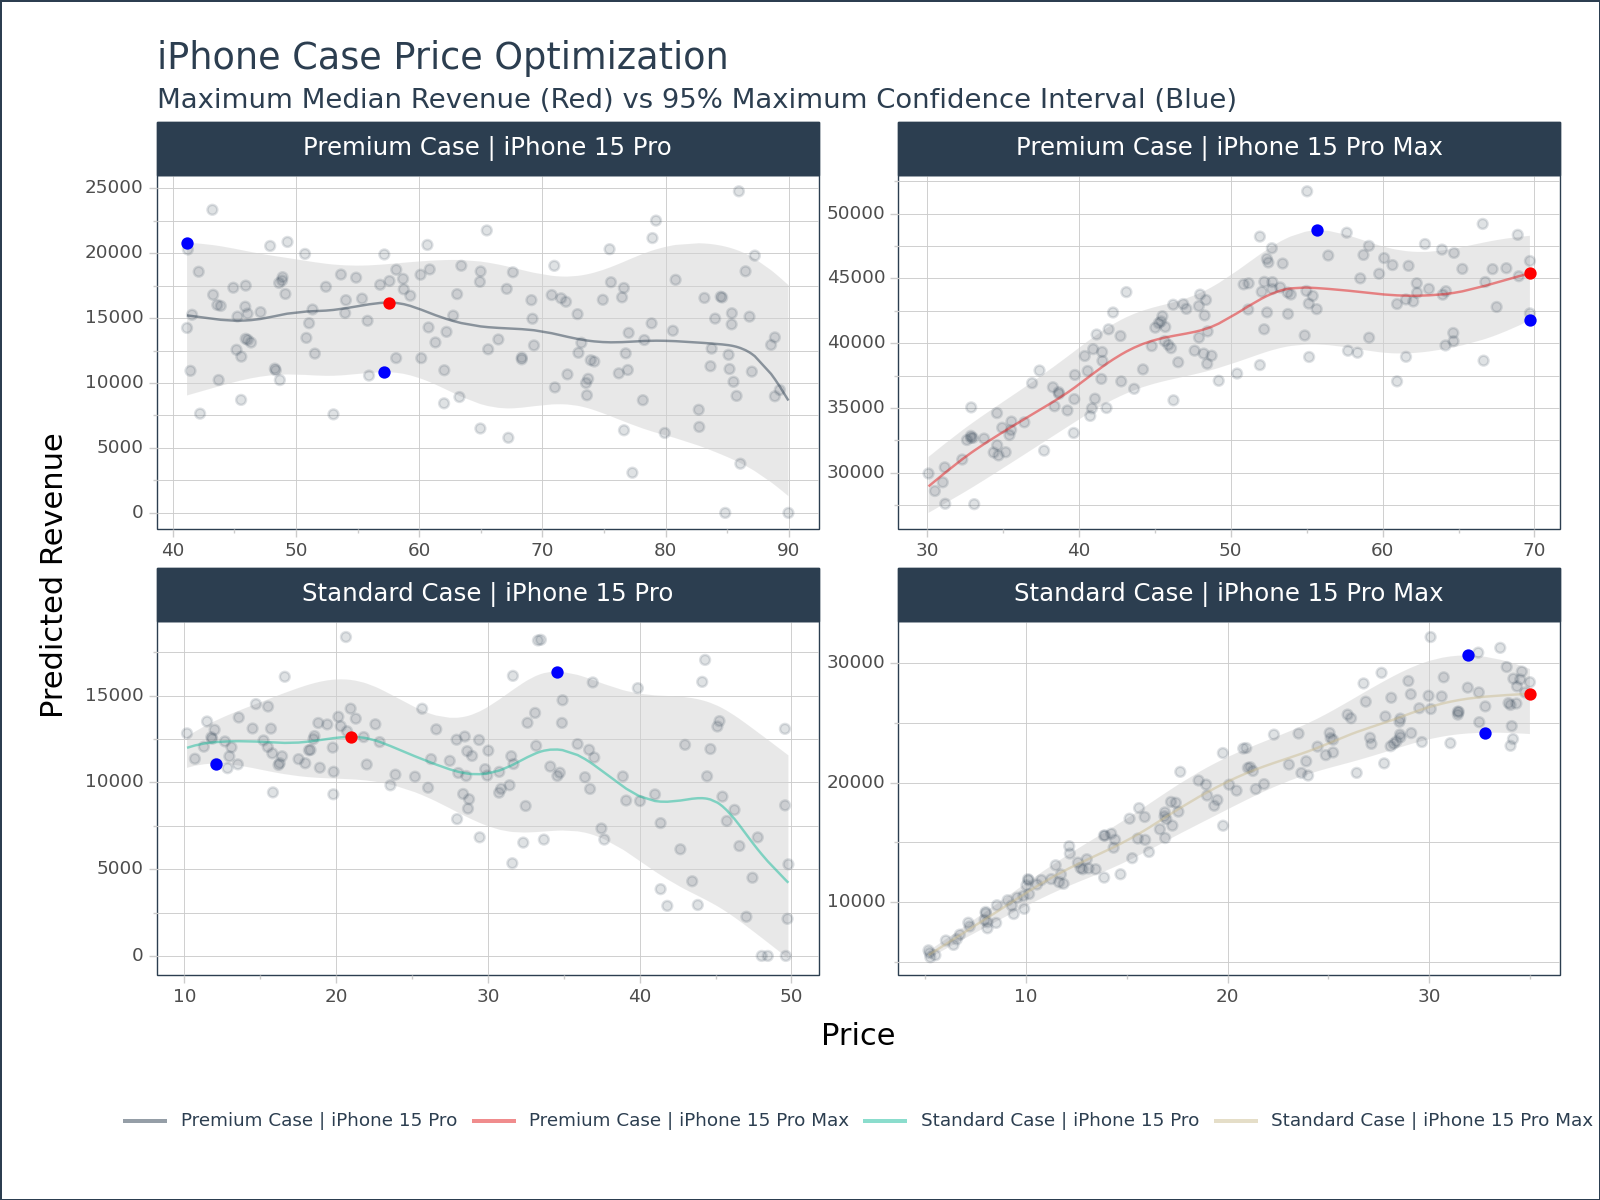

<Figure Size: (800 x 600)>

In [25]:


(
    ggplot(
        data = all_gam_results,
        mapping = aes(x='price', y='revenue_pred_0.5', color='product', group = 'product'),
    ) + \
    geom_ribbon(aes(ymax = "revenue_pred_0.975", ymin = "revenue_pred_0.025"), fill = "#d3d3d3", color = "#FF000000", alpha = 0.5, show_legend = False) + \
    # Uncomment to add actual revenue points
    geom_point(aes(y='revenue_actual'), alpha=0.15, color ="#2C3E50") + \
    geom_line(aes(y='revenue_pred_0.5'), alpha=0.5) + \
    geom_point(data = best_50, color = "red") + \
    geom_point(data=best_975, mapping = aes(y = 'revenue_pred_0.975'), color = "blue") + \
    geom_point(data=best_025, mapping = aes(y = 'revenue_pred_0.025'), color = "blue") + \
    facet_wrap('product', scales="free") + \
    labs(
        title = "iPhone Case Price Optimization",
        subtitle = "Maximum Median Revenue (Red) vs 95% Maximum Confidence Interval (Blue)",
        x = "Price",
        y = "Predicted Revenue"
    ) + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width = 800, height = 600) 
)



In [26]:
best_50[['product', 'price', 'revenue_pred_0.5', 'revenue_pred_0.025', 'revenue_pred_0.975']]


product  price  revenue_pred_0.5  \
681       Premium Case | iPhone 15 Pro  57.59      16190.632764   
249   Premium Case | iPhone 15 Pro Max  69.70      45396.103224   
501      Standard Case | iPhone 15 Pro  20.96      12624.071301   
126  Standard Case | iPhone 15 Pro Max  34.98      27407.914622   

     revenue_pred_0.025  revenue_pred_0.975  
681        10822.941290        19163.639437  
249        41758.157914        48296.058997  
501        10178.827809        15906.515173  
126        24042.376077        29469.337448

# MODELING GAMS WITH EVENTS:

** Wikipedia defines a GAM as a GLM “in which the linear response variable depends linearly on unknown smooth functions of some predictor variables”. In this context, “unknown smooth functions” means a combination of linear terms (i.e., linear functions of the independent variables), spline terms (i.e., piecewise polynomial functions of the independent variables), tensor product terms (i.e., interactions of the spline terms), and factor terms (i.e., categorical variables).

** GAMs relax the restriction that the relationship must be a simple weighted sum, and instead assume that the outcome can be modelled by a sum of arbitrary functions of each feature.


** To do this, we simply replace beta coefficients from Linear Regression with a flexible function which allows nonlinear relationships (we’ll look at the maths later).

This flexible function is called a spline. Splines are complex functions that allow us to model non-linear relationships for each feature. The sum of many splines forms a GAM.
# --------------------------

In [28]:
# Essentially the same process as above, but we need to filter out the "No Promo" events
# Gets a little tricky because of limited data points for each event

# Keep the entire data as data_filtered
data_filtered = data.query('event != "No Promo"')

# Create a list of unique products and events
unique_products = data_filtered['product'].unique()

events_only_gam_results = pd.DataFrame()

gam_results = {}

# Loop through each product
for product in unique_products:
        
    # Filter data for the current product and event
    product_event_data = data_filtered[(data_filtered['product'] == product)]
    
    if len(product_event_data) == 0:
        continue  # skip to next iteration if no data for current product-event combination

    X = product_event_data[['price', 'event']]
    y = product_event_data['quantity_sold']
    
    # NEW: Encode the event column
    le = LabelEncoder()
    X['event'] = le.fit_transform(X['event'])
    
    # NEW: use f(1) to indicate that the event column is categorical
    gam = GAM(l(0) + f(1))
    
    gam.fit(X, y)
    gam_results[f"pred_0.5"] = gam.predict(X)
    
    # Store the results in a dataframe with index that matches the original data
    predictions_gam = pd.DataFrame(gam_results).set_index(X.index)
    
    # Concatenate the results column-wise with the original data
    predictions_gam_df = pd.concat([product_event_data[['price', 'product', 'event', 'quantity_sold']], predictions_gam], axis=1)
    
    # Concatenate results row-wise
    events_only_gam_results = pd.concat([events_only_gam_results, predictions_gam_df], axis=0)

events_only_gam_results



price                            product         event  quantity_sold  \
1    33.87  Standard Case | iPhone 15 Pro Max  Black Friday           1299   
3    20.45  Standard Case | iPhone 15 Pro Max    New iPhone            572   
4    17.08  Standard Case | iPhone 15 Pro Max     Christmas           1170   
7    13.65  Standard Case | iPhone 15 Pro Max    New iPhone            699   
10   19.46  Standard Case | iPhone 15 Pro Max  The Big Game           1094   
..     ...                                ...           ...            ...   
787  40.47       Premium Case | iPhone 15 Pro    New iPhone            239   
791  63.29       Premium Case | iPhone 15 Pro  Black Friday            330   
795  60.05       Premium Case | iPhone 15 Pro    New iPhone            127   
797  72.69       Premium Case | iPhone 15 Pro  Black Friday            457   
798  54.28       Premium Case | iPhone 15 Pro    New iPhone             63   

        pred_0.5  
1    1214.774560  
3     603.148859  
4    1155.482759  
7     684.142593  
10   1088.429983  
..           ...  
787   273.187263  
791   343.007394  
795   144.010080  
797   280.991790  
798   182.077105  

[240 rows x 5 columns]

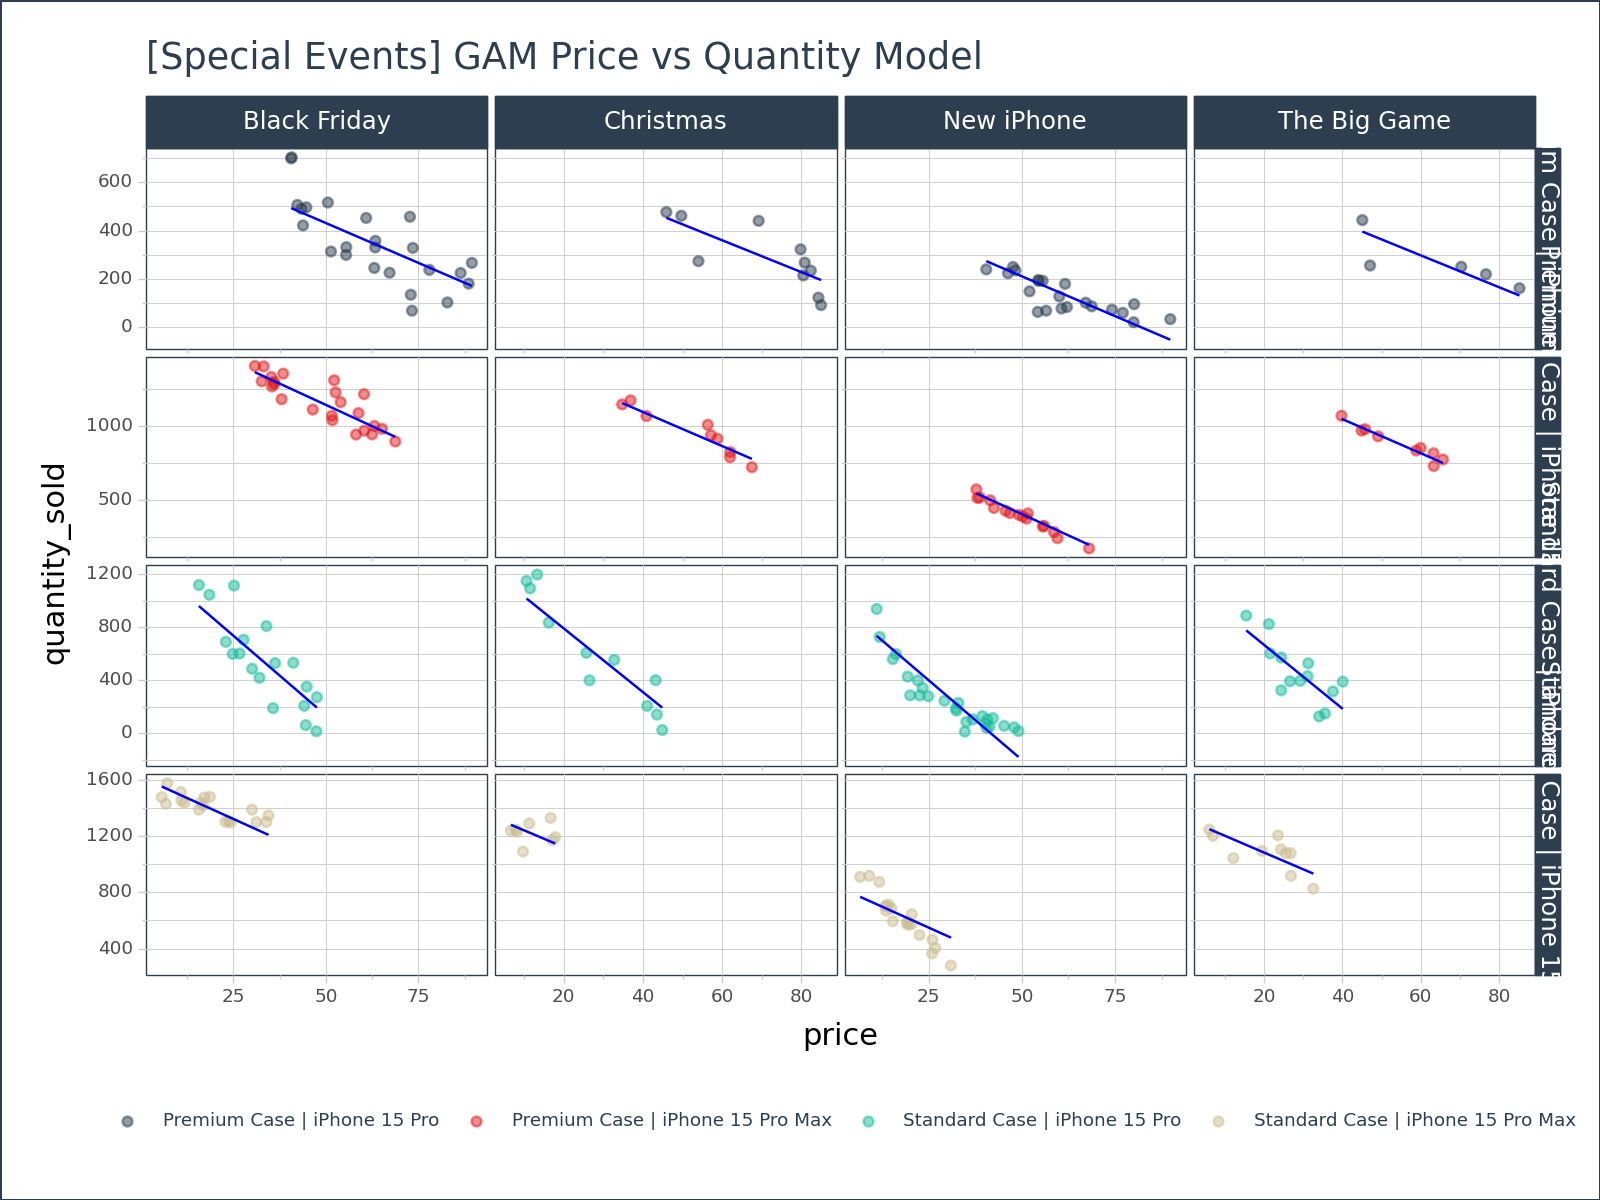

<Figure Size: (800 x 600)>

In [29]:
# Visualize the GAM Price Model Results
ggplot(
        data = events_only_gam_results,
        mapping = aes(x='price', y='quantity_sold', color='product'),
    ) + \
    geom_point(alpha=0.5) + \
    geom_line(aes(y = "pred_0.5"), color = "blue") + \
    facet_grid('product ~ event', scales = "free") + \
    labs(title = "[Special Events] GAM Price vs Quantity Model") + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width = 800, height = 600) 


In [30]:

# THEN OPTIMIZE PRICE FOR PREDICTED DAILY REVENUE

# Optimize Price for Predicted Daily Revenue

for col in events_only_gam_results.columns:
    if col.startswith('pred'):
        events_only_gam_results['revenue_' + col] =events_only_gam_results['price'] * events_only_gam_results[col]

events_only_gam_results

best_50 = events_only_gam_results \
    .groupby(['product', 'event']) \
    .apply(lambda x: x[x['revenue_pred_0.5'] == x['revenue_pred_0.5'].max()].head(1)) \
    .reset_index(level=0, drop=True)

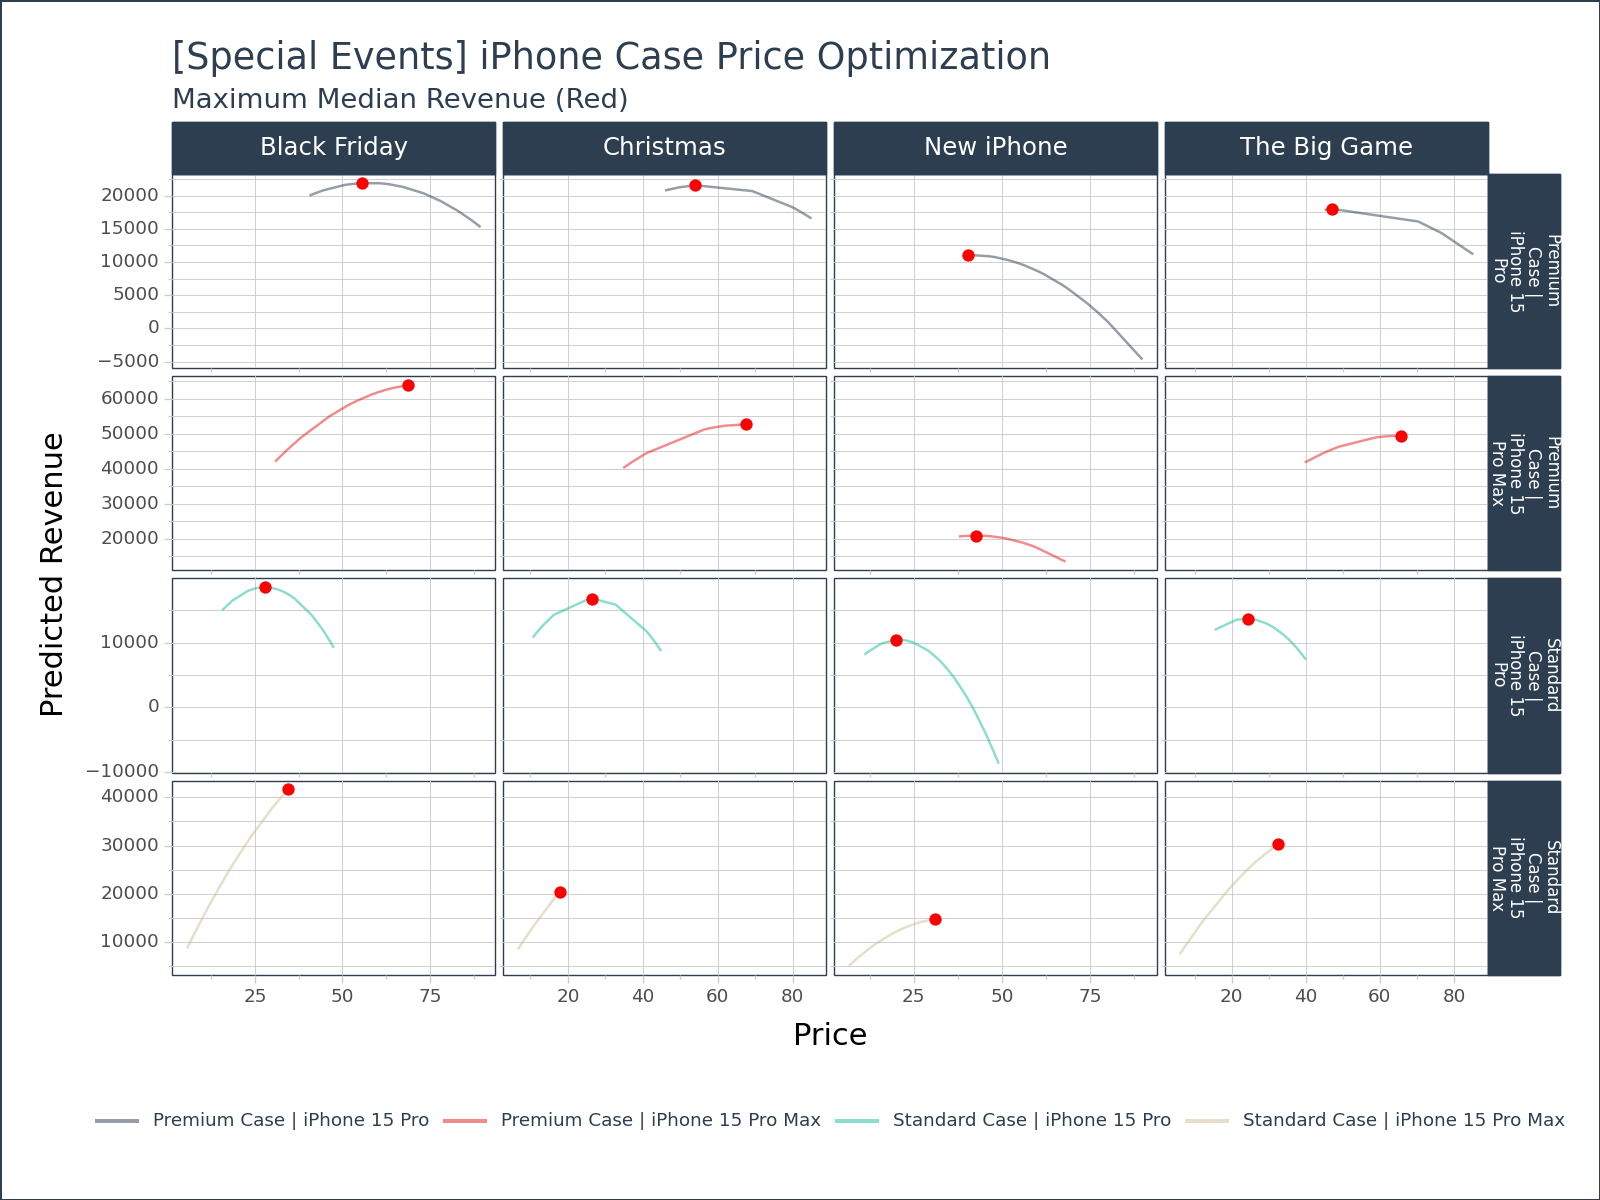

<Figure Size: (800 x 600)>

In [32]:

# Visualize the GAM Revenue Optimization Results

# Define the wrap function
def wrap_label(label, width=10):
    return '\n'.join(textwrap.wrap(label, width=width))

ggplot(
        data = events_only_gam_results,
        mapping = aes(x='price', y='revenue_pred_0.5', color='product', group = 'product'),
    ) + \
    geom_line(alpha=0.5) + \
    geom_point(data = best_50, color = "red") + \
    facet_grid('product ~ event', scales = "free", labeller=labeller(product=wrap_label)) + \
    labs(
        title = "[Special Events] iPhone Case Price Optimization",
        subtitle = "Maximum Median Revenue (Red)",
        x = "Price",
        y = "Predicted Revenue"
    ) + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width = 800, height = 600) + \
    theme(strip_text_y=element_text(size=6))



In [33]:
best_50

# BUSINESS INSIGHTS:
# ------------
# Events have a significant impact on price optimization.
# Prices should be optimized for each special event (e.g. Black Friday, Christmas).
# For demand decreasing events (e.g. New iPhone Model comes out), prices should be lowered to maximize revenue based on historical data.



price                            product         event  \
event                                                                      
Black Friday 779  55.49       Premium Case | iPhone 15 Pro  Black Friday   
Christmas    684  54.01       Premium Case | iPhone 15 Pro     Christmas   
New iPhone   787  40.47       Premium Case | iPhone 15 Pro    New iPhone   
The Big Game 782  47.07       Premium Case | iPhone 15 Pro  The Big Game   
Black Friday 398  68.74   Premium Case | iPhone 15 Pro Max  Black Friday   
Christmas    307  67.51   Premium Case | iPhone 15 Pro Max     Christmas   
New iPhone   323  42.54   Premium Case | iPhone 15 Pro Max    New iPhone   
The Big Game 252  65.68   Premium Case | iPhone 15 Pro Max  The Big Game   
Black Friday 500  27.75      Standard Case | iPhone 15 Pro  Black Friday   
Christmas    466  26.50      Standard Case | iPhone 15 Pro     Christmas   
New iPhone   589  20.05      Standard Case | iPhone 15 Pro    New iPhone   
The Big Game 482  24.38      Standard Case | iPhone 15 Pro  The Big Game   
Black Friday 96   34.46  Standard Case | iPhone 15 Pro Max  Black Friday   
Christmas    31   17.85  Standard Case | iPhone 15 Pro Max     Christmas   
New iPhone   172  30.99  Standard Case | iPhone 15 Pro Max    New iPhone   
The Big Game 19   32.57  Standard Case | iPhone 15 Pro Max  The Big Game   

                  quantity_sold     pred_0.5  revenue_pred_0.5  
event                                                           
Black Friday 779            331   394.467150      21888.982171  
Christmas    684            273   399.065156      21553.509072  
New iPhone   787            239   273.187263      11055.888550  
The Big Game 782            255   382.429685      18000.965251  
Black Friday 398            898   929.123711      63867.963920  
Christmas    307            724   780.239020      52673.936216  
New iPhone   323            448   492.661971      20957.840234  
The Big Game 252            776   752.978053      49455.598490  
Black Friday 500            706   669.376975      18575.211068  
Christmas    466            400   635.101193      16830.181602  
New iPhone   589            287   519.722904      10420.444231  
The Big Game 482            572   561.684630      13693.871284  
Black Friday 96            1347  1207.747162      41618.967204  
Christmas    31            1191  1146.311409      20461.658656  
New iPhone   172            279   477.608573      14801.089670  
The Big Game 19             825   932.278830      30364.321485